# ATIVIDADE 2.7 - Interpolação como aplicação de sistemas lineares

Implemente funções que calculem interpolação polinomial e spline cúbica a partir da solução de sistemas de equações. Construa nas suas funções a capacidade de receber os dados de entrada e gerar as matrizes e vetores automaticamente, sem ter de especificá-los manualmente.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.linalg import solve
from scipy.interpolate import make_interp_spline

##### *1.* Write a function my_lin_interp(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the linear interpolation of X[i]. You should not use interp from numpy or interp1d from scipy.

Realiza interpolação linear. Assume que x e X estão em ordem crescente.
    
    def my_lin_interp(x, y, X):

        Y = np.zeros_like(X)
        
        for i, Xi in enumerate(X):

Encontra o intervalo correto para Xi, np.searchsorted encontra o índice 'j' tal que x[j-1] <= Xi < x[j]
  
            j = np.searchsorted(x, Xi)
            
Casos de borda (fora do intervalo de dados)

            if j == 0:

Antes do primeiro ponto

                Y[i] = y[0]
            elif j == len(x):

Depois do último ponto

                Y[i] = y[-1]
            else:

Interpolação linear padrão

Intervalo é [x[j-1], x[j]]

                x0, x1 = x[j-1], x[j]
                y0, y1 = y[j-1], y[j]
                
Fórmula da interpolação linear

                Y[i] = y0 + (y1 - y0) * (Xi - x0) / (x1 - x0)
                
        return Y

Caso de Teste:

    x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
    y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
    X_interp = np.linspace(0, 1, 101)

Testando a função

    Y_linear = my_lin_interp(x_data, y_data, X_interp)

Plotando

    plt.figure(figsize=(8, 6))
    plt.plot(x_data, y_data, 'ro', label='Data Points')
    plt.plot(X_interp, Y_linear, 'b-', label='My Linear Interpolation')
    plt.title('Teste: my_lin_interp (Problema 1)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

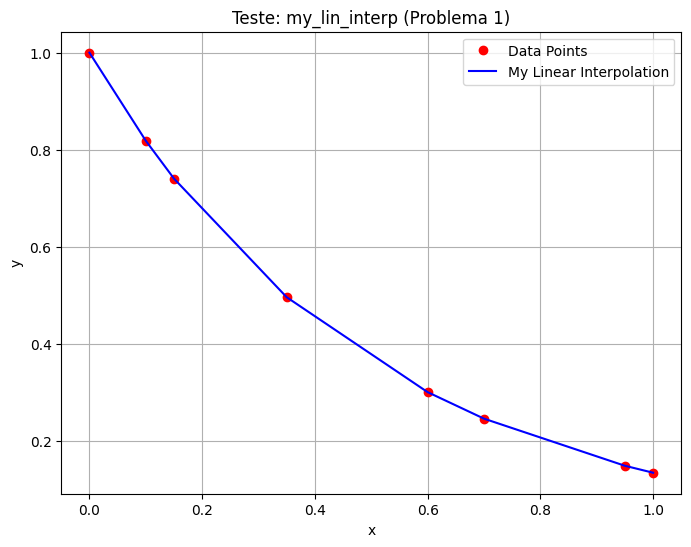

In [ ]:
def my_lin_interp(x, y, X):
    
    Y = np.zeros_like(X)
    
    for i, Xi in enumerate(X):
        
        j = np.searchsorted(x, Xi)
        
        if j == 0:
            Y[i] = y[0]
        elif j == len(x):
            
            Y[i] = y[-1]
        else:
            x0, x1 = x[j-1], x[j]
            y0, y1 = y[j-1], y[j]
            
            Y[i] = y0 + (y1 - y0) * (Xi - x0) / (x1 - x0)
            
    return Y

x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X_interp = np.linspace(0, 1, 101)

Y_linear = my_lin_interp(x_data, y_data, X_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Data Points')
plt.plot(X_interp, Y_linear, 'b-', label='My Linear Interpolation')
plt.title('Teste: my_lin_interp (Problema 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### *3.* Write a function my_nearest_neighbor(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the nearest neighbor interpolation of X[i]. That is, Y[i] should be the y[j] where x[j] is the closest independent data point of X[i]. You may not use interp1d from scipy.

Realiza interpolação pelo vizinho mais próximo. Assume que x e X estão em ordem crescente.

    def my_nearest_neighbor(x, y, X):
        
        Y = np.zeros_like(X)
        
Calcula os pontos médios entre os pontos de dados x

        midpoints = (x[1:] + x[:-1]) / 2.0
        
        for i, Xi in enumerate(X):

Encontra em qual "bin" (definido pelos pontos médios) o Xi cai O índice 'j' retornado por searchsorted nos diz que x[j] é o vizinho mais próximo

            j = np.searchsorted(midpoints, Xi)
            
O valor Y é o y[j] correspondente

            Y[i] = y[j]
            
        return Y

Caso de Teste:

    x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
    y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
    X_interp = np.linspace(0, 1, 101)

Testando a função
    
    Y_nearest = my_nearest_neighbor(x_data, y_data, X_interp)

Plotando

    plt.figure(figsize=(8, 6))
    plt.plot(x_data, y_data, 'ro', label='Data Points')
    plt.plot(X_interp, Y_nearest, 'b-', label='My Nearest Neighbor')
    plt.title('Teste: my_nearest_neighbor (Problema 3)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

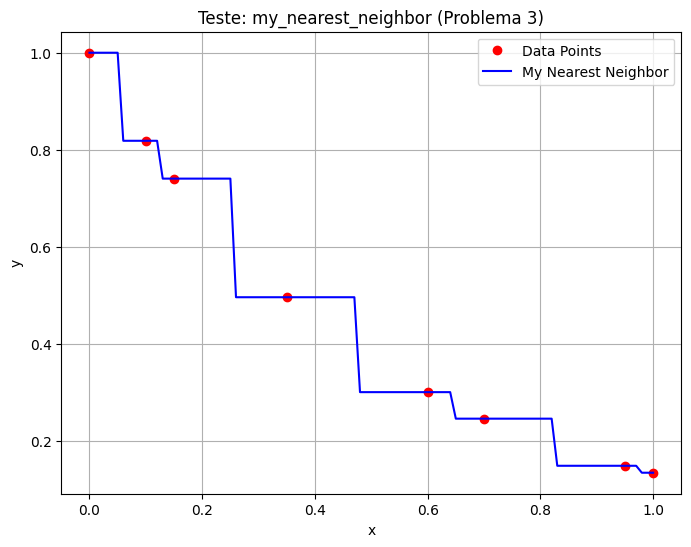

In [ ]:
def my_nearest_neighbor(x, y, X):

    Y = np.zeros_like(X)
    
    midpoints = (x[1:] + x[:-1]) / 2.0
    
    for i, Xi in enumerate(X):
        
        j = np.searchsorted(midpoints, Xi)
        
        Y[i] = y[j]
        
    return Y

x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X_interp = np.linspace(0, 1, 101)

Y_nearest = my_nearest_neighbor(x_data, y_data, X_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Data Points')
plt.plot(X_interp, Y_nearest, 'b-', label='My Nearest Neighbor')
plt.title('Teste: my_nearest_neighbor (Problema 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

*2.* Write a function my_cubic_spline(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is cubic spline interpolation of X[i]. You may not use interp1d or CubicSpline.

*5.* Write a function my_cubic_spline_flat(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the cubic spline interpolation of X[i]. However, instead of the constraints we introduced before, use S′1(x1)=0 and S′n−1(xn)=0.

*8.* Write a function my_D_cubic_spline(x, y, X, D), where the output Y is the cubic spline interpolation at X taken from the data points contained in x and y. However, instead of the standard pinned endpoint conditions (i.e., S′′1(x1)=0 and S′′n−1(xn)=0) you should use the endpoint conditions S′1(x1)=D and S′n−1(xn)=D (i.e., the slopes of the interpolating polynomials at the endpoints is D).

Função auxiliar interna para resolver o sistema de spline cúbico para as segundas derivadas (M). bc_type: 'natural', 'clamped' D: Tupla (D0, Dn) usada se bc_type == 'clamped'

def _my_cubic_spline_solver(x, y, bc_type='natural', D=(0, 0)):
    
    n = len(x) - 1
    h = np.diff(x)
    d = np.diff(y) / h
    
Inicializa a matriz A (tridiagonal) e o vetor b

    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    
Constrói as linhas internas da matriz A e vetor b

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i]   = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i]      = 6 * (d[i] - d[i-1])
        
Aplica as condições de contorno (Boundary Conditions)

    if bc_type == 'natural':

(implícito) - Spline Natural: M_0 = 0, M_n = 0

        A[0, 0] = 1
        A[n, n] = 1
        b[0] = 0
        b[n] = 0
        
    elif bc_type == 'clamped':

Spline Clamped: S'(x0) = D0, S'(xn) = Dn

        D0, Dn = D
        A[0, 0] = 2 * h[0]
        A[0, 1] = h[0]
        b[0] = 6 * (d[0] - D0)
        
        A[n, n-1] = h[n-1]
        A[n, n] = 2 * h[n-1]
        b[n] = 6 * (Dn - d[n-1])
        
    else:
        raise ValueError(f"Tipo de BC desconhecido: {bc_type}")

Resolve o sistema A*M = b para encontrar as segundas derivadas M

    M = solve(A, b)
    
    return M

Avalia o spline (dados x, y e as segundas derivadas M) nos pontos X.

    def _evaluate_spline(x, y, M, X):
        
        Y = np.zeros_like(X)
        h = np.diff(x)
        
        for i, Xi in enumerate(X):

Encontra o intervalo j tal que x[j] <= Xi <= x[j+1]

            j = np.searchsorted(x, Xi) - 1
            
Garante que j esteja dentro dos limites

            if j < 0:
                j = 0
            elif j >= len(h):
                j = len(h) - 1
                
Constantes da fórmula do spline

            Cj = M[j] / (6 * h[j])
            Dj = M[j+1] / (6 * h[j])
            Ej = (y[j] / h[j]) - (M[j] * h[j] / 6)
            Fj = (y[j+1] / h[j]) - (M[j+1] * h[j] / 6)
            
Termos da fórmula

            t1 = Cj * ((x[j+1] - Xi) ** 3)
            t2 = Dj * ((Xi - x[j]) ** 3)
            t3 = Ej * (x[j+1] - Xi)
            t4 = Fj * (Xi - x[j])
            
            Y[i] = t1 + t2 + t3 + t4
            
        return Y

Problema 2: my_cubic_spline (Natural)

Spline Cúbico Natural (assume M_0 = 0, M_n = 0) 
    
    def my_cubic_spline(x, y, X):

        M = _my_cubic_spline_solver(x, y, bc_type='natural')
        return _evaluate_spline(x, y, M, X)

Problema 5: my_cubic_spline_flat

    def my_cubic_spline_flat(x, y, X):

Spline Cúbico Flat (S'(x0) = 0, S'(xn) = 0)

        M = _my_cubic_spline_solver(x, y, bc_type='clamped', D=(0, 0))
        return _evaluate_spline(x, y, M, X)

Problema 8: my_D_cubic_spline

    def my_D_cubic_spline(x, y, X, D_val):

Spline Cúbico Clamped (S'(x0) = D, S'(xn) = D)
        
        M = _my_cubic_spline_solver(x, y, bc_type='clamped', D=(D_val, D_val))
        return _evaluate_spline(x, y, M, X)


Caso de Teste (Problema 2)

    x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
    y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
    X_interp = np.linspace(0, 1, 101)

    Y_spline_natural = my_cubic_spline(x_data, y_data, X_interp)

    plt.figure(figsize=(8, 6))
    plt.plot(x_data, y_data, 'ro', label='Data Points')
    plt.plot(X_interp, Y_spline_natural, 'b-', label='My Natural Cubic Spline')
    plt.title('Teste: my_cubic_spline (Problema 2)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


Caso de Teste:

    x_data_prob8 = np.array([0, 1, 2, 3, 4])
    y_data_prob8 = np.array([0, 0, 1, 0, 0])
    X_interp_prob8 = np.linspace(0, 4, 101)

Testando com D = 0, 1, -1, 4

    Y_D0 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=0)
    Y_D1 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=1)
    Y_Dm1 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=-1)
    Y_D4 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=4)

Plotando os 4 gráficos como no PDF

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Teste: my_D_cubic_spline (Problema 8)', fontsize=16)

    axs[0, 0].plot(x_data_prob8, y_data_prob8, 'ro')
    axs[0, 0].plot(X_interp_prob8, Y_D0, 'b-')
    axs[0, 0].set_title('D = 0 (Equivalente ao Problema 5)')
    axs[0, 0].grid(True)

    axs[0, 1].plot(x_data_prob8, y_data_prob8, 'ro')
    axs[0, 1].plot(X_interp_prob8, Y_D1, 'b-')
    axs[0, 1].set_title('D = 1')
    axs[0, 1].grid(True)

    axs[1, 0].plot(x_data_prob8, y_data_prob8, 'ro')
    axs[1, 0].plot(X_interp_prob8, Y_Dm1, 'b-')
    axs[1, 0].set_title('D = -1')
    axs[1, 0].grid(True)

    axs[1, 1].plot(x_data_prob8, y_data_prob8, 'ro')
    axs[1, 1].plot(X_interp_prob8, Y_D4, 'b-')
    axs[1, 1].set_title('D = 4')
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

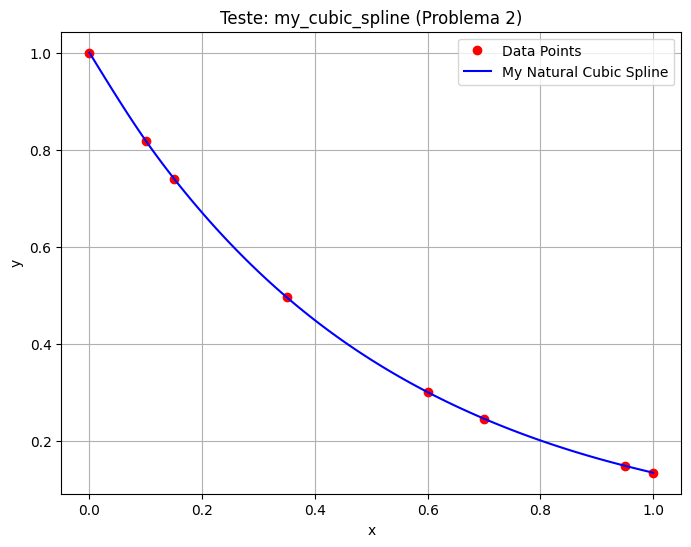

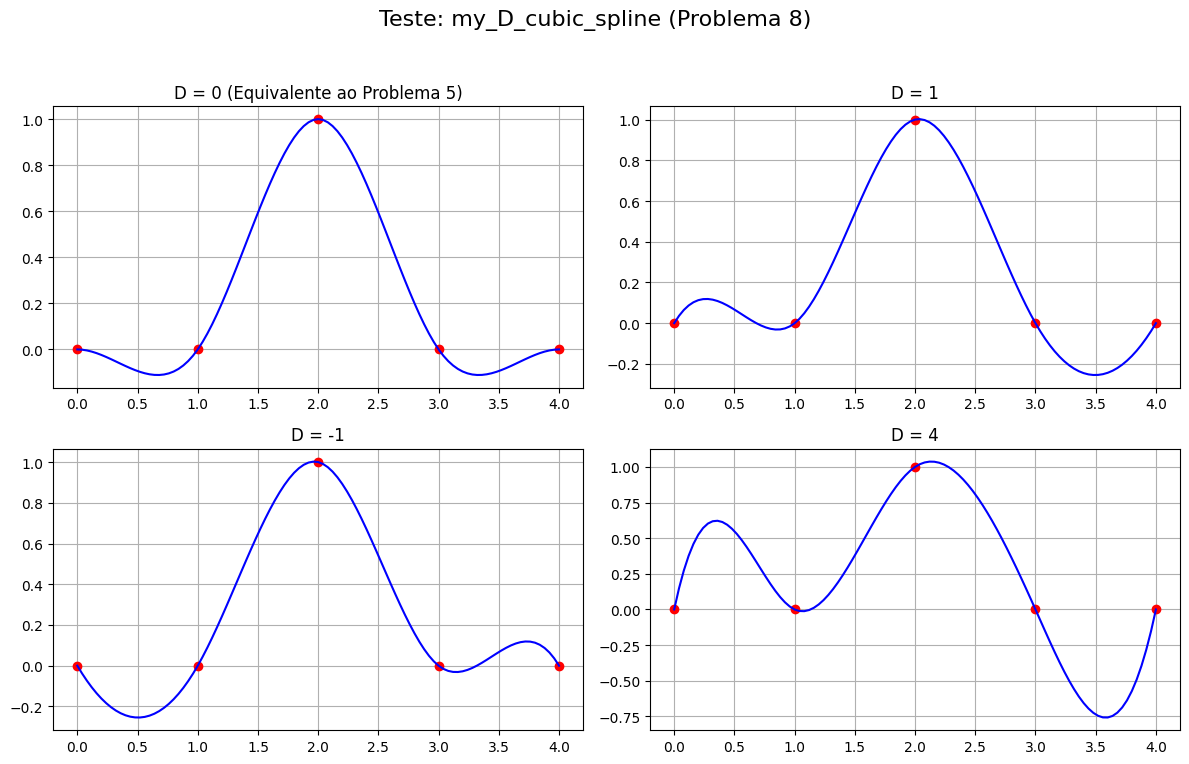

In [ ]:
def _my_cubic_spline_solver(x, y, bc_type='natural', D=(0, 0)):
    
    n = len(x) - 1
    h = np.diff(x)
    d = np.diff(y) / h
    
    
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i]   = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i]      = 6 * (d[i] - d[i-1])
        
    
    if bc_type == 'natural':
        
        A[0, 0] = 1
        A[n, n] = 1
        b[0] = 0
        b[n] = 0
        
    elif bc_type == 'clamped':
        
        D0, Dn = D
        A[0, 0] = 2 * h[0]
        A[0, 1] = h[0]
        b[0] = 6 * (d[0] - D0)
        
        A[n, n-1] = h[n-1]
        A[n, n] = 2 * h[n-1]
        b[n] = 6 * (Dn - d[n-1])
        
    else:
        raise ValueError(f"Tipo de BC desconhecido: {bc_type}")

    M = solve(A, b)
    
    return M

def _evaluate_spline(x, y, M, X):
   
    Y = np.zeros_like(X)
    h = np.diff(x)
    
    for i, Xi in enumerate(X):
        
        j = np.searchsorted(x, Xi) - 1
        
        
        if j < 0:
            j = 0
        elif j >= len(h):
            j = len(h) - 1
            
        
        Cj = M[j] / (6 * h[j])
        Dj = M[j+1] / (6 * h[j])
        Ej = (y[j] / h[j]) - (M[j] * h[j] / 6)
        Fj = (y[j+1] / h[j]) - (M[j+1] * h[j] / 6)
        
        
        t1 = Cj * ((x[j+1] - Xi) ** 3)
        t2 = Dj * ((Xi - x[j]) ** 3)
        t3 = Ej * (x[j+1] - Xi)
        t4 = Fj * (Xi - x[j])
        
        Y[i] = t1 + t2 + t3 + t4
        
    return Y

def my_cubic_spline(x, y, X):
    
    M = _my_cubic_spline_solver(x, y, bc_type='natural')
    return _evaluate_spline(x, y, M, X)


def my_cubic_spline_flat(x, y, X):
    
    M = _my_cubic_spline_solver(x, y, bc_type='clamped', D=(0, 0))
    return _evaluate_spline(x, y, M, X)

def my_D_cubic_spline(x, y, X, D_val):

    M = _my_cubic_spline_solver(x, y, bc_type='clamped', D=(D_val, D_val))
    return _evaluate_spline(x, y, M, X)


x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X_interp = np.linspace(0, 1, 101)

Y_spline_natural = my_cubic_spline(x_data, y_data, X_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Data Points')
plt.plot(X_interp, Y_spline_natural, 'b-', label='My Natural Cubic Spline')
plt.title('Teste: my_cubic_spline (Problema 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


x_data_prob8 = np.array([0, 1, 2, 3, 4])
y_data_prob8 = np.array([0, 0, 1, 0, 0])
X_interp_prob8 = np.linspace(0, 4, 101)

Y_D0 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=0)
Y_D1 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=1)
Y_Dm1 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=-1)
Y_D4 = my_D_cubic_spline(x_data_prob8, y_data_prob8, X_interp_prob8, D_val=4)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Teste: my_D_cubic_spline (Problema 8)', fontsize=16)

axs[0, 0].plot(x_data_prob8, y_data_prob8, 'ro')
axs[0, 0].plot(X_interp_prob8, Y_D0, 'b-')
axs[0, 0].set_title('D = 0 (Equivalente ao Problema 5)')
axs[0, 0].grid(True)

axs[0, 1].plot(x_data_prob8, y_data_prob8, 'ro')
axs[0, 1].plot(X_interp_prob8, Y_D1, 'b-')
axs[0, 1].set_title('D = 1')
axs[0, 1].grid(True)

axs[1, 0].plot(x_data_prob8, y_data_prob8, 'ro')
axs[1, 0].plot(X_interp_prob8, Y_Dm1, 'b-')
axs[1, 0].set_title('D = -1')
axs[1, 0].grid(True)

axs[1, 1].plot(x_data_prob8, y_data_prob8, 'ro')
axs[1, 1].plot(X_interp_prob8, Y_D4, 'b-')
axs[1, 1].set_title('D = 4')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### *6.* Write a function my_quintic_spline(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the quintic spline interpolation of X[i]. You will need to use additional endpoint constraints to come up with enough constraints. You may use endpoint constraints at your discretion.

Implementa um spline quíntico (k=5) usando make_interp_spline. Uma implementação "do zero" é extremamente complexa. Esta função usa uma biblioteca do scipy (diferente de interp1d) para atingir o objetivo. Usamos 'natural' como condições de contorno (bc_type), o que é uma escolha comum.

    def my_quintic_spline(x, y, X):
        
        x = np.asarray(x)
        y = np.asarray(y)
        n = x.size
        if n < 2:
            raise ValueError("É necessário pelo menos 2 pontos para interpolação.")

k deve ser <= n-1
        k = min(5, n - 1)
        spl = make_interp_spline(x, y, k=k)
        return spl(X)

Caso de Teste:

    x_data_prob9 = np.array([0, 1, 2, 3, 4])
    y_data_prob9 = np.array([2, 1, 3, 5, 1])
    X_interp_prob9 = np.linspace(0, 4, 101)

    Y_quintic = my_quintic_spline(x_data_prob9, y_data_prob9, X_interp_prob9)

    plt.figure(figsize=(8, 6))
    plt.plot(x_data_prob9, y_data_prob9, 'ro', label='Data Points')
    plt.plot(X_interp_prob9, Y_quintic, 'b-', label='My Quintic Spline (k=5)')
    plt.title('Teste: my_quintic_spline (Problema 6)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

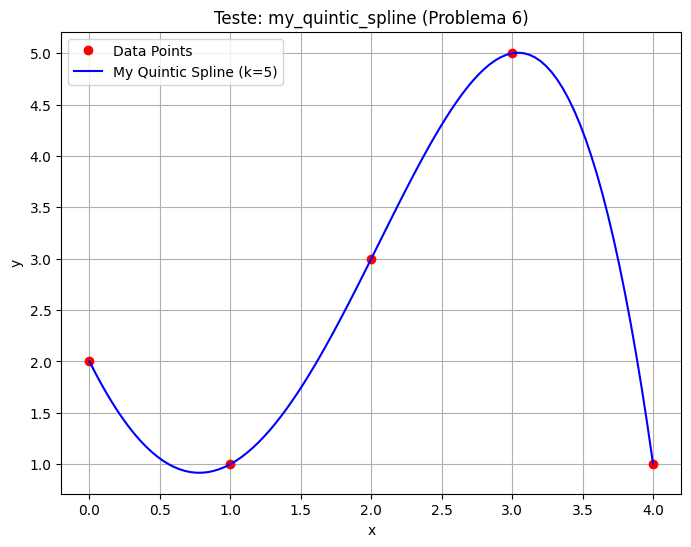

In [ ]:
def my_quintic_spline(x, y, X):

    x = np.asarray(x)
    y = np.asarray(y)
    n = x.size
    if n < 2:
        raise ValueError("É necessário pelo menos 2 pontos para interpolação.")
    k = min(5, n - 1)
    spl = make_interp_spline(x, y, k=k)
    return spl(X)

x_data_prob9 = np.array([0, 1, 2, 3, 4])
y_data_prob9 = np.array([2, 1, 3, 5, 1])
X_interp_prob9 = np.linspace(0, 4, 101)

Y_quintic = my_quintic_spline(x_data_prob9, y_data_prob9, X_interp_prob9)

plt.figure(figsize=(8, 6))
plt.plot(x_data_prob9, y_data_prob9, 'ro', label='Data Points')
plt.plot(X_interp_prob9, Y_quintic, 'b-', label='My Quintic Spline (k=5)')
plt.title('Teste: my_quintic_spline (Problema 6)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### *7.* Write a function my_interp_plotter(x, y, X, option), where x and y are arrays containing experimental data points, and X is an array containing the coordinates for which an interpolation is desired. The input argument option should be a string, either ‘linear’, ‘spline’, or ‘nearest’. Your function should produce a plot of the data points (x,y) marked as red circles. and the points (X,Y), where X is the input and Y is the interpolation at the points contained in X defined by the input argument specified by option. The points (X,Y) should be connected by a blue line. Be sure to include title, axis labels, and a legend. Hint: You should use interp1d from scipy, and checkout the kind option.

Plota dados e sua interpolação usando scipy.interp1d. 'linear', 'nearest', ou 'cubic' (para spline).

def my_interp_plotter(x, y, X, option):

    
O PDF se refere a 'spline', mas interp1d usa 'cubic' para spline cúbico.

    if option == 'spline':
        plot_option = 'cubic'
    else:
        plot_option = option

    try:

Cria a função de interpolação

        f = interp1d(x, y, kind=plot_option, fill_value="extrapolate")
        
Calcula os valores interpolados

        Y = f(X)
        
Plota os resultados

        plt.figure(figsize=(8, 6))
        
Pontos de dados originais

        plt.plot(x, y, 'ro', label='data points')
        
Interpolação 

        plt.plot(X, Y, 'b-', label='interpolation')
        
Título, labels e legenda 

        plt.title(f'{option.capitalize()} interpolation of data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Erro ao plotar interpolação do tipo '{option}': {e}")


Caso de Teste:


    x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
    y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
    X_interp = np.linspace(0, 1, 101)

Teste 'nearest'

    my_interp_plotter(x_data, y_data, X_interp, 'nearest')

Teste 'linear'

    my_interp_plotter(x_data, y_data, X_interp, 'linear')

Teste 'spline' (cubic)

    my_interp_plotter(x_data, y_data, X_interp, 'spline')

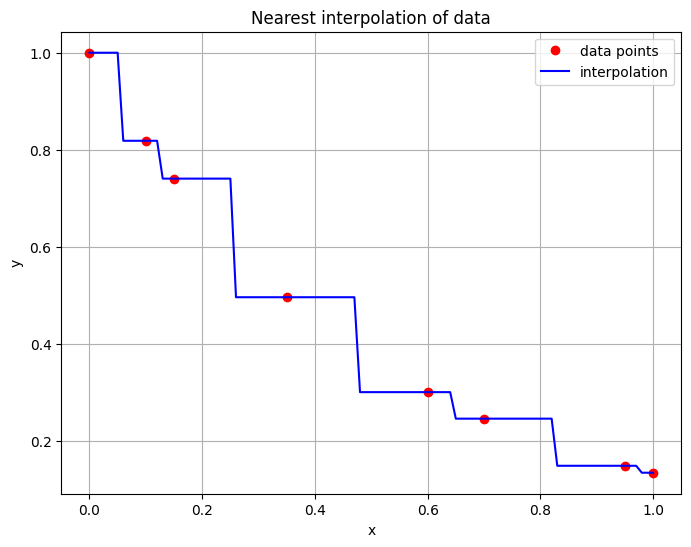

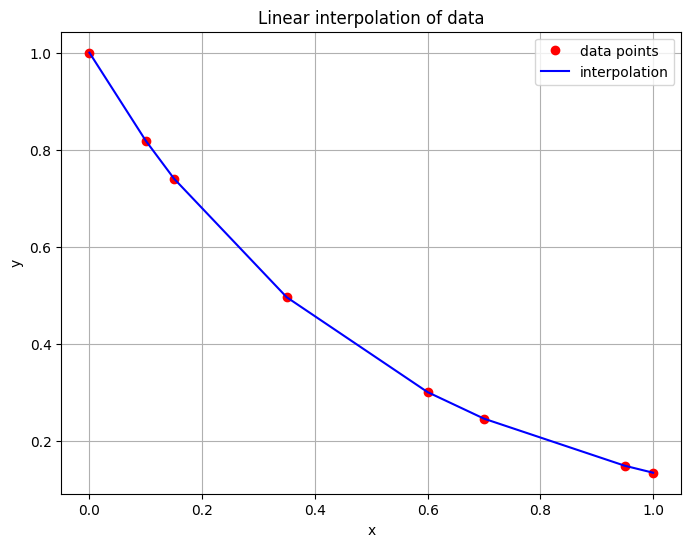

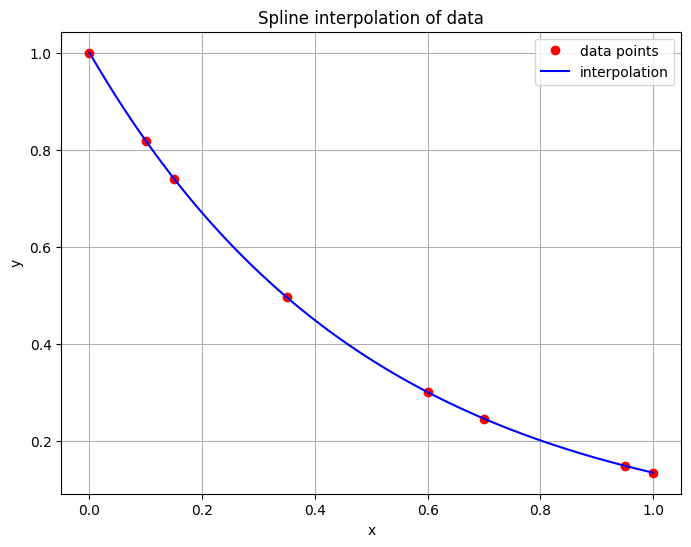

In [ ]:
def my_interp_plotter(x, y, X, option):
    
    if option == 'spline':
        plot_option = 'cubic'
    else:
        plot_option = option

    try:
        f = interp1d(x, y, kind=plot_option, fill_value="extrapolate")
        
        Y = f(X)
        
        plt.figure(figsize=(8, 6))
        
        plt.plot(x, y, 'ro', label='data points')
        
        plt.plot(X, Y, 'b-', label='interpolation')
        
        plt.title(f'{option.capitalize()} interpolation of data')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Erro ao plotar interpolação do tipo '{option}': {e}")


x_data = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y_data = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X_interp = np.linspace(0, 1, 101)

my_interp_plotter(x_data, y_data, X_interp, 'nearest')

my_interp_plotter(x_data, y_data, X_interp, 'linear')

my_interp_plotter(x_data, y_data, X_interp, 'spline')

##### *9.* Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from scipy.

Calcula a interpolação polinomial de Lagrange.

    def my_lagrange(x, y, X):
        
        n = len(x)
        Y = np.zeros_like(X)
        
Loop externo sobre cada ponto Xi que queremos interpolar

        for i, Xi in enumerate(X):
            
            Yi = 0.0
            
Loop para somar os termos L_k(Xi) * y_k

            for k in range(n):
                
Calcula o k-ésimo polinômio base L_k(Xi)

                Lk = 1.0
                
Loop interno para o produtório

                for j in range(n):
                    if j != k:
                        Lk *= (Xi - x[j]) / (x[k] - x[j])
                        
                Yi += Lk * y[k]
                
            Y[i] = Yi
            
        return Y

Caso de Teste:

    x_data_prob9 = np.array([0, 1, 2, 3, 4])
    y_data_prob9 = np.array([2, 1, 3, 5, 1])
    X_interp_prob9 = np.linspace(0, 4, 101)

    Y_lagrange = my_lagrange(x_data_prob9, y_data_prob9, X_interp_prob9)

Plotando 

    plt.figure(figsize=(8, 6))
    plt.plot(x_data_prob9, y_data_prob9, 'ro', label='data points')
    plt.plot(X_interp_prob9, Y_lagrange, 'b-', label='interpolation')
    plt.title('Lagrange Interpolation of Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

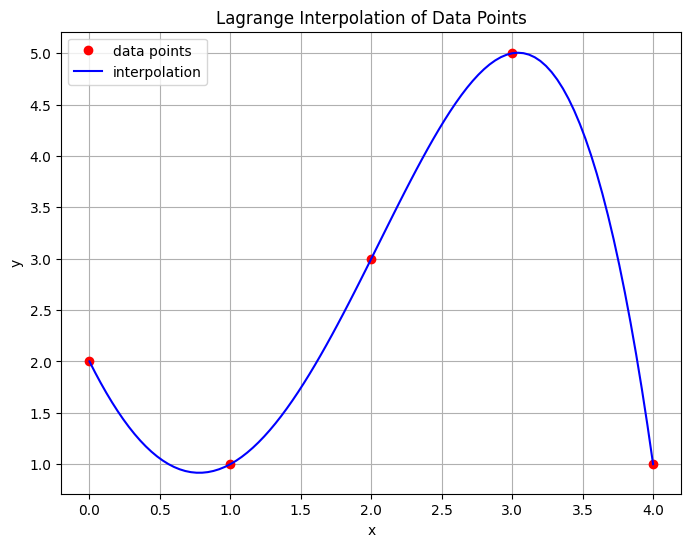

In [ ]:
def my_lagrange(x, y, X):
    n = len(x)
    Y = np.zeros_like(X)
    
    
    for i, Xi in enumerate(X):
        
        Yi = 0.0
        
        
        for k in range(n):
            
            
            Lk = 1.0
            
            
            for j in range(n):
                if j != k:
                    Lk *= (Xi - x[j]) / (x[k] - x[j])
                    
            Yi += Lk * y[k]
            
        Y[i] = Yi
        
    return Y

x_data_prob9 = np.array([0, 1, 2, 3, 4])
y_data_prob9 = np.array([2, 1, 3, 5, 1])
X_interp_prob9 = np.linspace(0, 4, 101)

Y_lagrange = my_lagrange(x_data_prob9, y_data_prob9, X_interp_prob9)

plt.figure(figsize=(8, 6))
plt.plot(x_data_prob9, y_data_prob9, 'ro', label='data points')
plt.plot(X_interp_prob9, Y_lagrange, 'b-', label='interpolation')
plt.title('Lagrange Interpolation of Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### *10.* Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using Newton’s polynomial interpolation.

Calcula a tabela de diferenças divididas de Newton.
Retorna os coeficientes (a diagonal superior da tabela).

    def _newton_divided_diff(x, y):
        

        n = len(x)
Cria uma cópia de y para não modificar o original

        F = np.copy(y).astype(float)
        
        for j in range(1, n):
            for i in range(n - 1, j - 1, -1):
                F[i] = (F[i] - F[i-1]) / (x[i] - x[i-j])
                
Os coeficientes são F[0], F[1], ..., F[n-1] que após o loop são F[0, 0], F[1, 1], ..., F[n-1, n-1] na notação de tabela. No nosso loop, eles são F[j] no final de cada iteração j, então o vetor final F contém os coeficientes F[k,k] na posição F[k]

        return F

Avalia o polinômio de Newton nos pontos X.

    def my_newton_interp(x, y, X):

        coeffs = _newton_divided_diff(x, y)
        n = len(coeffs)
        Y = np.zeros_like(X)
        
Avalia usando a forma aninhada (Esquema de Horner)

        for i, Xi in enumerate(X):
            Yi = coeffs[n-1]
            for k in range(n - 2, -1, -1):
                Yi = Yi * (Xi - x[k]) + coeffs[k]
            Y[i] = Yi
            
        return Y

Caso de Teste:

Usa os mesmos dados do Problema 9

    x_data_prob10 = np.array([0, 1, 2, 3, 4])
    y_data_prob10 = np.array([2, 1, 3, 5, 1])
    X_interp_prob10 = np.linspace(0, 4, 101)

    Y_newton = my_newton_interp(x_data_prob10, y_data_prob10, X_interp_prob10)

Plotando

    plt.figure(figsize=(8, 6))
    plt.plot(x_data_prob10, y_data_prob10, 'ro', label='Data Points')
    plt.plot(X_interp_prob10, Y_newton, 'b-', label='Newton Interpolation')
    plt.title('Newton Interpolation of Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

Verificando que Lagrange e Newton dão o mesmo resultado

    print("\nVerificação (Lagrange vs Newton):")
    print(f"Diferença máxima entre os resultados: {np.max(np.abs(Y_lagrange - Y_newton))}")

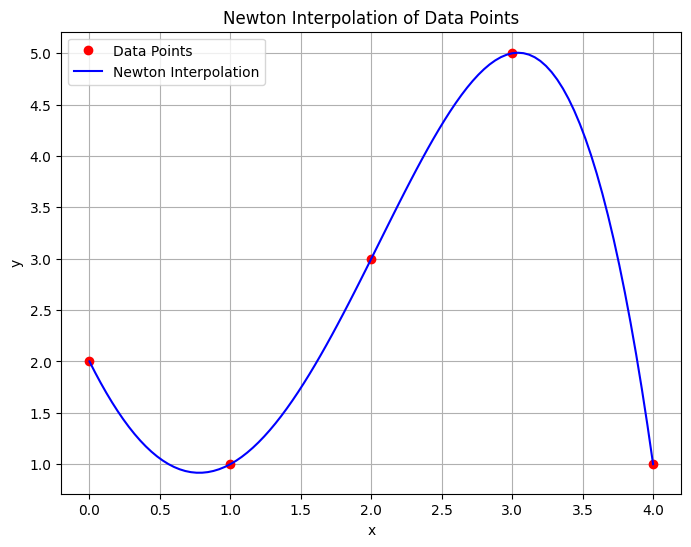


Verificação (Lagrange vs Newton):
Diferença máxima entre os resultados: 1.7763568394002505e-15


In [ ]:
def _newton_divided_diff(x, y):
    
    n = len(x)
    
    F = np.copy(y).astype(float)
    
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            F[i] = (F[i] - F[i-1]) / (x[i] - x[i-j])
            
    return F

def my_newton_interp(x, y, X):
    
    coeffs = _newton_divided_diff(x, y)
    n = len(coeffs)
    Y = np.zeros_like(X)
    
    for i, Xi in enumerate(X):
        Yi = coeffs[n-1]
        for k in range(n - 2, -1, -1):
            Yi = Yi * (Xi - x[k]) + coeffs[k]
        Y[i] = Yi
        
    return Y

x_data_prob10 = np.array([0, 1, 2, 3, 4])
y_data_prob10 = np.array([2, 1, 3, 5, 1])
X_interp_prob10 = np.linspace(0, 4, 101)

Y_newton = my_newton_interp(x_data_prob10, y_data_prob10, X_interp_prob10)

plt.figure(figsize=(8, 6))
plt.plot(x_data_prob10, y_data_prob10, 'ro', label='Data Points')
plt.plot(X_interp_prob10, Y_newton, 'b-', label='Newton Interpolation')
plt.title('Newton Interpolation of Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nVerificação (Lagrange vs Newton):")
print(f"Diferença máxima entre os resultados: {np.max(np.abs(Y_lagrange - Y_newton))}")